# Cricket Hackathon 2021- IITM

### Checks :
    
- Repeating names of same stadium 
- No season 2020
- Change NaN values
- wicket types - all are not credited to bowler
- stats for batsmen,  bowler, team, venue
- batsmen v/s bowler stats
- powerplay stats
<br><br/>
- error in team stats

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [7]:
# df = pd.read_csv('C:\\Users\\varad\\Desktop\\cricket_hackathon\\ipl_csv2\\all_matches.csv')
df = pd.read_csv('ipl_csv2/all_matches.csv')

C:\Users\varad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194353,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.6,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df[df.season == '2021']

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193617,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193618,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193619,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193620,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193621,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
df.shape

(194354, 22)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 22 columns):
match_id                  194354 non-null int64
season                    194354 non-null object
start_date                194354 non-null object
venue                     194354 non-null object
innings                   194354 non-null int64
ball                      194354 non-null float64
batting_team              194354 non-null object
bowling_team              194354 non-null object
striker                   194354 non-null object
non_striker               194354 non-null object
bowler                    194354 non-null object
runs_off_bat              194354 non-null int64
extras                    194354 non-null int64
wides                     5884 non-null float64
noballs                   774 non-null float64
byes                      511 non-null float64
legbyes                   3118 non-null float64
penalty                   2 non-null float64
wicket_type         

In [257]:
# null values present in wides, noballs, legbyes, penalty, wicket_type, player_dismissed, other_wicket_type
# and other_player_dismissed

In [258]:
df.season.value_counts()

2013       18177
2011       17013
2020/21    14559
2009/10    14498
2014       14300
2016       14096
2017       13862
2015       13652
2009       13606
2007/08    13489
2012       10837
2018        8903
2019        7997
2012        6930
2019        6315
2018        5383
2021         737
Name: season, dtype: int64

In [259]:
df.season.unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', 2012, 2013, 2014,
       2015, 2016, 2017, 2019, 2018, '2018', '2019', '2020/21', '2021'],
      dtype=object)

In [313]:
df.other_player_dismissed.unique()

array([nan])

In [260]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

## Stadiums having different names- 

- 'Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium',
<br><br/>
- 'Feroz Shah Kotla', 'Arun Jaitley Stadium'
<br><br/>
- 'MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai'
<br><br/>
- 'Wankhede Stadium', 'Wankhede Stadium, Mumbai'
<br><br/>
- 'Subrata Roy Sahara Stadium', 'Maharashtra Cricket Association Stadium'
<br><br/>
- 'Rajiv Gandhi International Stadium, Uppal', 'Rajiv Gandhi International Stadium'
<br><br/>
- 'Sardar Patel Stadium, Motera', 'Narendra Modi Stadium'
<br><br/>
- 'M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium'

In [261]:
#  correction for stadium names

In [262]:
df.venue.replace({'Wankhede Stadium, Mumbai':'Wankhede Stadium', 
                  'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                  'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium',
                  'Feroz Shah Kotla':'Arun Jaitley Stadium',
                  'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium',
                  'MA Chidambaram Stadium, Chepauk, Chennai':'MA Chidambaram Stadium',
                  'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium',
                  'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium, Mohali',
                  'Punjab Cricket Association IS Bindra Stadium':'Punjab Cricket Association Stadium, Mohali',
                  'M Chinnaswamy Stadium': 'M.Chinnaswamy Stadium'},
                inplace = True)

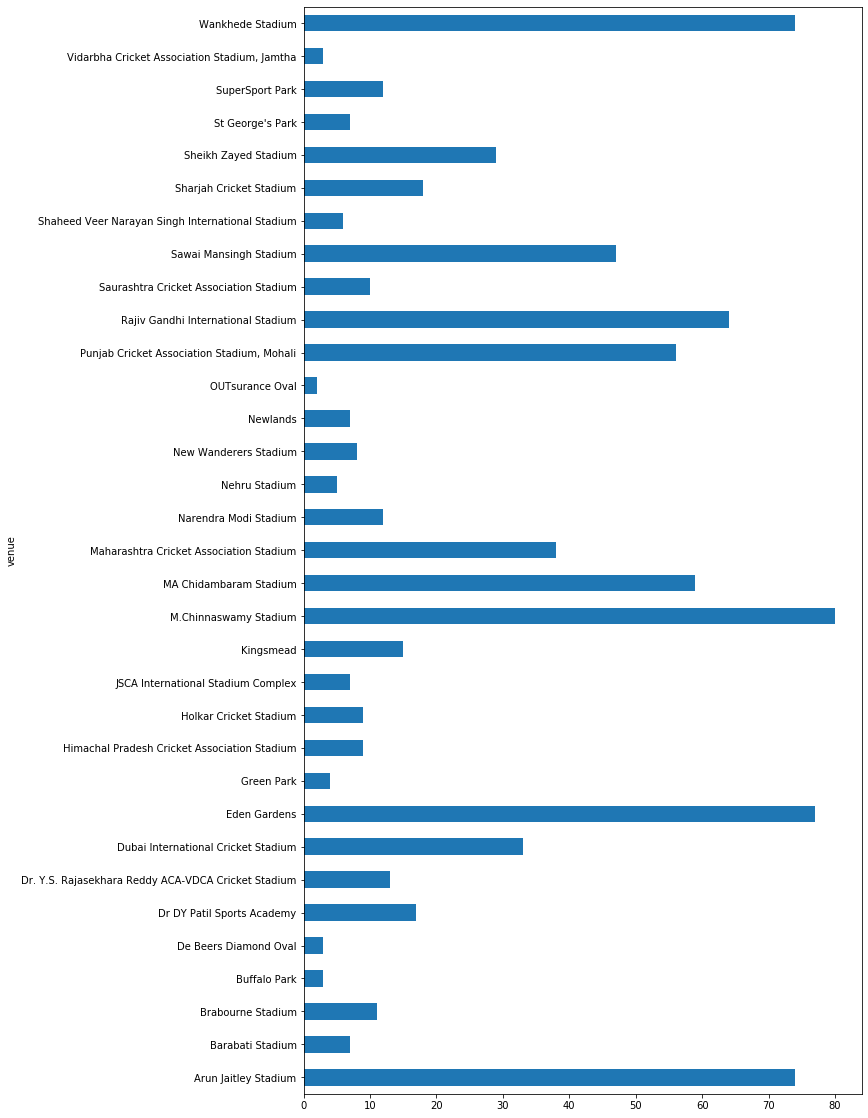

In [263]:
df.groupby('venue').match_id.nunique().plot(kind = 'barh', figsize = (10,20))
# df.groupby('match_id')

In [264]:
df.venue.nunique()

33

In [265]:
# df.groupby('match_id').venue

## Checking for team names-  

In [266]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

**teams with different names**

- 'Delhi Daredevils', 'Delhi Capitals'
- 'Deccan Chargers', 'Sunrisers Hyderabad'
- 'Pune Warriors', 'Rising Pune Supergiants', 'Rising Pune Supergiant'
- 'Kings XI Punjab', 'Punjab Kings'

In [267]:
# correction for team names 

In [268]:
df.batting_team.replace({'Delhi Daredevils': 'Delhi Capitals',
                         'Rising Pune Supergiant': 'Rising Pune Supergiants',
                         'Kings XI Punjab': 'Punjab Kings'},
                        inplace = True)

## Checking for striker names-

In [269]:
sorted(df.striker.unique())

['A Ashish Reddy',
 'A Chandila',
 'A Chopra',
 'A Choudhary',
 'A Dananjaya',
 'A Flintoff',
 'A Kumble',
 'A Mishra',
 'A Mithun',
 'A Mukund',
 'A Nehra',
 'A Nortje',
 'A Singh',
 'A Symonds',
 'A Uniyal',
 'A Zampa',
 'AA Bilakhia',
 'AA Chavan',
 'AA Jhunjhunwala',
 'AA Noffke',
 'AB Agarkar',
 'AB Barath',
 'AB Dinda',
 'AB McDonald',
 'AB de Villiers',
 'AC Blizzard',
 'AC Gilchrist',
 'AC Thomas',
 'AC Voges',
 'AD Hales',
 'AD Mascarenhas',
 'AD Mathews',
 'AD Nath',
 'AD Russell',
 'AF Milne',
 'AG Murtaza',
 'AG Paunikar',
 'AJ Finch',
 'AJ Turner',
 'AJ Tye',
 'AL Menaria',
 'AM Nayar',
 'AM Rahane',
 'AN Ahmed',
 'AN Ghosh',
 'AP Dole',
 'AP Majumdar',
 'AP Tare',
 'AR Bawne',
 'AR Patel',
 'AS Joseph',
 'AS Rajpoot',
 'AS Raut',
 'AS Yadav',
 'AT Carey',
 'AT Rayudu',
 'AUK Pathan',
 'Abdul Samad',
 'Abdur Razzak',
 'Abhishek Sharma',
 'Anirudh Singh',
 'Ankit Sharma',
 'Ankit Soni',
 'Anureet Singh',
 'Arshdeep Singh',
 'Avesh Khan',
 'Azhar Mahmood',
 'B Akhil',
 'B Ch

- all names are uniques in striker

Also assuming bowler names will be unique as well

In [270]:
df.innings.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [272]:
df.innings.value_counts()

1    100561
2     93644
3        71
4        66
5         8
6         4
Name: innings, dtype: int64

In [273]:
df.runs_off_bat.unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [274]:
df.wides.unique()

array([nan,  1.,  5.,  2.,  3.,  4.])

In [275]:
df.penalty.unique()

array([nan,  5.])

In [276]:
df.wicket_type.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [277]:
# df.wicket_type.replace([np.nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
#        'stumped', 'caught and bowled', 'hit wicket',
#        'obstructing the field'], [0,1,1,2,1,2,1,1,1,2],
#                       inplace = True)


In [278]:
# df['wicket'] = df.wicket_type.replace([np.nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
#        'stumped', 'caught and bowled', 'hit wicket',
#        'obstructing the field'], [0,1,1,2,1,2,1,1,1,2])

In [279]:
df.other_wicket_type.unique()

array([nan])

caught                   5766
bowled                   1714
run out                   905
lbw                       579
stumped                   294
caught and bowled         277
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: wicket_type, dtype: int64


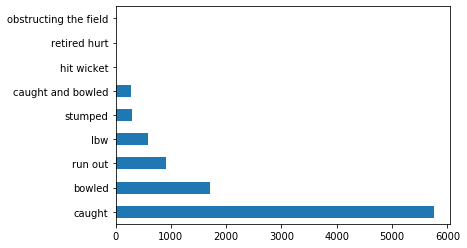

In [280]:
print(df.wicket_type.value_counts())
df.wicket_type.value_counts().plot(kind = 'barh')

## New columns:

In [281]:
df['total_runs'] = df['runs_off_bat'] + df['extras']

In [282]:
df['wicket'] = df.wicket_type.replace([np.nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], [0,1,1,2,1,2,1,1,1,2])

# Collecting Stats for Batsmen, Bowlers, Teams, Venues: 

## Stats for Batsmen:

In [314]:
#  for batsmen

stats_batsman = {}
tot_batsmen   = df.striker.unique()

for i,batsman in enumerate(tot_batsmen):
    
    inns = df[df.striker == batsman]['match_id'].nunique()
    out = df[df.player_dismissed == batsman]['match_id'].nunique()
    
    # also add out in powerplay ????
    
    # correction in avg done. (Total Runs/total dismissals)
    avg = df[df.striker == batsman]['runs_off_bat'].sum()/out
    
    sr  = 100*df[df.striker == batsman]['runs_off_bat'].sum()/len(df[df.striker == batsman])
    
    # changing fours and sixes for per innings
    
    fours = len(df[df.striker == batsman][df['runs_off_bat'] == 4])/inns
    
    sixes = len(df[df.striker == batsman][df['runs_off_bat'] == 6])/inns
    
    # adding average powerplay scores:
    
    pp = df[df.striker == batsman][df['ball'] < 6.0]['runs_off_bat'].sum()/df[df.striker == batsman][df.ball<6.0]['match_id'].nunique()
    
#     what about recent batsmen eg. Rahul Tewatia
    
    print(i)
    stats_batsman[batsman] = {'avg': round(avg,2),
                              'sr' : round(sr,2),
                              'fours': round(fours,2),
                              'sixes': round(sixes,2),
                              'pp': round(pp,2),
                              'inns': inns}

C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0
1
2
3
4
5
6
7
8
9
10


C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


131
132
133
134
135
136
137
138


C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388


In [347]:
print('V Kohli- ', stats_batsman['V Kohli'])

V Kohli-  {'avg': 38.2, 'sr': 127.55, 'fours': 2.76, 'sixes': 1.09, 'pp': 12.71, 'inns': 185}


In [315]:
print('S Dhawan-',stats_batsman['S Dhawan'])

S Dhawan- {'avg': 34.52, 'sr': 123.9, 'fours': 3.41, 'sixes': 0.63, 'pp': 15.79, 'inns': 176}


In [316]:
print('KL Rahul-',stats_batsman['KL Rahul'])

KL Rahul- {'avg': 44.97, 'sr': 132.92, 'fours': 3.25, 'sixes': 1.44, 'pp': 18.66, 'inns': 72}


In [285]:
# batsmen v/s bowler stats ?????

## Stats for Bowlers:

In [409]:
# for bowlers

stats_bowler = {}
tot_bowlers  = df.bowler.unique()
# print(tot_bowlers)
for i,bowler in enumerate(tot_bowlers):
    
    runs  = df[df.bowler == bowler]['total_runs'].sum()
    wkts  = len(df[df.bowler == bowler][df.wicket == 1])
    overs = len(df[df.bowler == bowler])/6.0
    inns  = df[df.bowler == bowler]['match_id'].nunique()
    
#     econ = df[df.bowler == bowler]['total_runs'].sum()/len(df[df.bowler == bowler]['match_id'].unique())
#     avg_wkts = df[df.bowler == bowler][df.wicket_type == 'caught' or df.wicket_type == 'bowled' or df.wicket_type == 'lbw' or df.wicket_type == 'caught and bowled' or df.wicket_type == 'stumped'].sum()/len(df[df.bowler == bowler]['match_id'].unique())
#     avg = df[df.bowler == bowler][df.wicket == 1].sum()/len(df[df.bowler == bowler]['match_id'].unique())
   
    print(i)
    
    econ = runs/overs
    if wkts:
        avg  = runs/wkts
        sr   = overs*6.0/wkts 
    else:
        avg = 50
        sr  = 50
    
    
#     career_avg[batsman] = avg
#     strike_rate[batsman] = sr



# check for runout do not give to bowler
# have not included hit wicket for now 

    stats_bowler[bowler] = {'runs': int(runs),
                            'econ':round(econ,2),
                            'avg':round(avg,2),
                            'sr':round(sr,2), 
                            'inns':int(inns)}


C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [410]:
list(stats_bowler['B Kumar'].values())

[3378, 7.19, 24.66, 20.58, 122]

In [288]:
print(str(float(3.0)).split('.'))

['3', '0']


## Stats for Teams:

In [299]:
stats_team = {}
tot_teams = df.batting_team.unique()

for i, team in enumerate(tot_teams):
    
    print(team)
    
    inn1 = df[df.batting_team == team][df.innings == 1]['match_id'].nunique()
    inn2 = df[df.batting_team == team][df.innings == 2]['match_id'].nunique()
    
    scored_1 = df[df.batting_team == team][df.innings == 1][df.ball < 6.0]['total_runs'].sum()/inn1
    conceded_1 = df[df.bowling_team == team][df.innings == 1][df.ball < 6.0]['total_runs'].sum()/inn1
    
    scored_2 = df[df.batting_team == team][df.innings == 2][df.ball < 6.0]['total_runs'].sum()/inn2
    conceded_2 = df[df.bowling_team == team][df.innings == 2][df.ball < 6.0]['total_runs'].sum()/inn2
    
    stats_team[team] = {'scored_1':round(scored_1,2), 
                        'conceded_1': round(conceded_1,2),
                        'scored_2':round(scored_2,2), 
                        'conceded_2': round(conceded_2,2)}
    
    
#     Gaussian Distribution ?????

Kolkata Knight Riders
Royal Challengers Bangalore
Chennai Super Kings


C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykerne

Punjab Kings
Rajasthan Royals
Delhi Capitals
Deccan Chargers
Mumbai Indians
Kochi Tuskers Kerala
Pune Warriors
Sunrisers Hyderabad
Rising Pune Supergiants
Gujarat Lions


In [300]:
for key in stats_team.keys():
    print(key,'- ',stats_team[key])

Kolkata Knight Riders -  {'scored_1': 44.43, 'conceded_1': 47.21, 'scored_2': 47.93, 'conceded_2': 45.04}
Royal Challengers Bangalore -  {'scored_1': 43.58, 'conceded_1': 49.27, 'scored_2': 45.59, 'conceded_2': 42.96}
Chennai Super Kings -  {'scored_1': 44.62, 'conceded_1': 40.37, 'scored_2': 45.73, 'conceded_2': 52.15}
Punjab Kings -  {'scored_1': 45.87, 'conceded_1': 0.0, 'scored_2': 47.94, 'conceded_2': 0.0}
Rajasthan Royals -  {'scored_1': 45.85, 'conceded_1': 56.79, 'scored_2': 43.78, 'conceded_2': 38.02}
Delhi Capitals -  {'scored_1': 45.16, 'conceded_1': 8.62, 'scored_2': 46.75, 'conceded_2': 7.76}
Deccan Chargers -  {'scored_1': 42.81, 'conceded_1': 33.21, 'scored_2': 49.25, 'conceded_2': 56.25}
Mumbai Indians -  {'scored_1': 45.34, 'conceded_1': 35.86, 'scored_2': 45.29, 'conceded_2': 53.05}
Kochi Tuskers Kerala -  {'scored_1': 45.86, 'conceded_1': 36.43, 'scored_2': 51.29, 'conceded_2': 48.29}
Pune Warriors -  {'scored_1': 40.95, 'conceded_1': 56.0, 'scored_2': 43.04, 'conced

# Stats for Venues:

In [321]:
stats_venue = {}
tot_venues = df.venue.unique()

for i, venue in enumerate(tot_venues):
    
    print(venue)
    
    inns = df[df.venue == venue]['match_id'].nunique()
    
    scored_1 = df[df.venue == venue][df.innings == 1][df.ball < 6.0]['total_runs'].sum()/inns
    scored_2 = df[df.venue == venue][df.innings == 2][df.ball < 6.0]['total_runs'].sum()/inns
    
    stats_venue[venue] = {'scored_1':round(scored_1,2), 
                         'scored_2': round(scored_2,2)}

M.Chinnaswamy Stadium
Punjab Cricket Association Stadium, Mohali
Arun Jaitley Stadium
Eden Gardens
Wankhede Stadium


C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


Sawai Mansingh Stadium
Rajiv Gandhi International Stadium
MA Chidambaram Stadium
Dr DY Patil Sports Academy
Newlands
St George's Park
Kingsmead
SuperSport Park
Buffalo Park
New Wanderers Stadium
De Beers Diamond Oval
OUTsurance Oval
Brabourne Stadium
Narendra Modi Stadium
Barabati Stadium
Vidarbha Cricket Association Stadium, Jamtha
Himachal Pradesh Cricket Association Stadium
Nehru Stadium
Holkar Cricket Stadium
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Maharashtra Cricket Association Stadium
Shaheed Veer Narayan Singh International Stadium
JSCA International Stadium Complex
Sheikh Zayed Stadium
Sharjah Cricket Stadium
Dubai International Cricket Stadium
Saurashtra Cricket Association Stadium
Green Park


In [322]:
print(stats_venue['Wankhede Stadium'])

{'scored_1': 44.38, 'scored_2': 46.93}


In [323]:
print(stats_venue['Eden Gardens'])

{'scored_1': 45.65, 'scored_2': 46.88}


In [48]:
input_data = pd.read_csv('input_test_data.csv')
input_data

,venue,innings,batting_team,bowling_team,batsmen,bowlers,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,RT Ponting,P Kumar,Z Khan,AA Noffke


In [139]:
match_ids = df.match_id.unique()
match_ids.shape

(819,)

In [151]:
df[df.match_id == 335982][df.innings == 1]['batting_team'].unique()

C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['Kolkata Knight Riders'], dtype=object)

In [349]:
data_1 = {'venue':[df[df.match_id == id][df.innings == 1]['venue'].unique()[0] for id in match_ids],
          'batting_team':[df[df.match_id == id][df.innings == 1]['batting_team'].unique()[0] for id in match_ids],
          'bowling_team':[df[df.match_id == id][df.innings == 1]['bowling_team'].unique()[0] for id in match_ids],
          'total_runs': [df[df.match_id == id][df.innings == 1][df.ball < 6.0]['total_runs'].sum() for id in match_ids],
          'batsmen':[df[df.match_id == id][df.innings == 1][df.ball < 6.0]['striker'].unique() for id in match_ids],
          'bowler':[df[df.match_id == id][df.innings == 1][df.ball < 6.0]['bowler'].unique() for id in match_ids]}

rough = pd.DataFrame(data = data_1)
rough

C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\varad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key

,venue,batting_team,bowling_team,total_runs,batsmen,bowler
0,M.Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,"[SC Ganguly, BB McCullum, RT Ponting]","[P Kumar, Z Khan, AA Noffke]"
1,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,53,"[PA Patel, ML Hayden, MEK Hussey]","[B Lee, S Sreesanth, JR Hopes]"
2,Arun Jaitley Stadium,Rajasthan Royals,Delhi Daredevils,40,"[T Kohli, YK Pathan, SR Watson, M Kaif]","[GD McGrath, B Geeves, MF Maharoof]"
3,Eden Gardens,Deccan Chargers,Kolkata Knight Riders,39,"[AC Gilchrist, Y Venugopal Rao, VVS Laxman, A ...","[AB Dinda, I Sharma, AB Agarkar]"
4,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,47,"[L Ronchi, ST Jayasuriya, DJ Thornely, RV Utha...","[P Kumar, Z Khan, JH Kallis]"
...,...,...,...,...,...,...
814,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,65,"[MP Stoinis, S Dhawan]","[Sandeep Sharma, JO Holder, S Nadeem]"
815,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,41,"[MP Stoinis, AM Rahane, S Dhawan, SS Iyer, RR ...","[TA Boult, JJ Bumrah, J Yadav, NM Coulter-Nile]"
816,MA Chidambaram Stadium,Mumbai Indians,Royal Challengers Bangalore,41,"[RG Sharma, CA Lynn, SA Yadav]","[Mohammed Siraj, KA Jamieson, YS Chahal]"
817,Wankhede Stadium,Chennai Super Kings,Delhi Capitals,33,"[RD Gaikwad, F du Plessis, MM Ali, SK Raina]","[CR Woakes, Avesh Khan, R Ashwin, TK Curran]"


In [350]:
X1 = []

for i in range(len(rough)):
    
    stats = []
    
    avg = np.array([stats_batsman[bat]['avg'] for bat in rough.iloc[i]['batsmen']]).mean().round(2)
    sr = np.array([stats_batsman[bat]['sr'] for bat in rough.iloc[i]['batsmen']]).mean().round(2)    
    fours = np.array([stats_batsman[bat]['fours'] for bat in rough.iloc[i]['batsmen']]).mean().round(2)    
    sixes = np.array([stats_batsman[bat]['sixes'] for bat in rough.iloc[i]['batsmen']]).mean().round(2) 
    pp = np.array([stats_batsman[bat]['pp'] for bat in rough.iloc[i]['batsmen']]).mean().round(2) 
#     removing four and sixes for now since they are career total
    
    X1.append([avg,sr,fours,sixes,pp])#,fours,sixes])

In [351]:
np.array(X1)

array([[ 21.09,  99.71,   1.9 ,   0.72,  10.49],
       [ 32.75, 122.84,   3.29,   0.88,  16.14],
       [ 19.6 , 106.9 ,   1.35,   0.75,   9.07],
       ...,
       [ 31.85, 132.02,   2.69,   1.12,  14.71],
       [ 32.33, 132.09,   2.26,   1.06,  12.02],
       [ 30.76, 127.24,   2.38,   1.01,  12.38]])

In [352]:
X2 = []

for i in range(len(rough)):
    
    stats = []
    
    econ = np.array([stats_bowler[bowl]['econ'] for bowl in rough.iloc[i]['bowler']]).mean().round(2)
    av = np.array([stats_bowler[bowl]['avg'] for bowl in rough.iloc[i]['bowler']]).mean().round(2)
    sr = np.array([stats_bowler[bowl]['sr'] for bowl in rough.iloc[i]['bowler']]).mean().round(2)    
#     fours = np.array([stats_batsman[bat]['fours'] for bat in rough.iloc[i]['batsmen']]).mean().round(2)    
#     sixes = np.array([stats_batsman[bat]['sixes'] for bat in rough.iloc[i]['batsmen']]).mean().round(2) 
    
#     removing four and sixes for now since they are career total
    
    X2.append([econ,av,sr])#,fours,sixes])



In [327]:
np.array(X2)

array([[ 8.33, 35.39, 25.54],
       [ 8.09, 38.57, 28.89],
       [ 8.35, 47.07, 30.92],
       ...,
       [ 7.59, 26.37, 21.1 ],
       [ 8.91, 33.25, 22.49],
       [ 7.43, 28.24, 22.77]])

In [ ]:
X3 = 

In [158]:
print(len(data_1['batting_team']))

819


In [353]:
train = np.c_[X1,X2,rough['total_runs'].values]

In [354]:
train

array([[ 21.09,  99.71,   1.9 , ...,  35.39,  25.54,  61.  ],
       [ 32.75, 122.84,   3.29, ...,  38.57,  28.89,  53.  ],
       [ 19.6 , 106.9 ,   1.35, ...,  47.07,  30.92,  40.  ],
       ...,
       [ 31.85, 132.02,   2.69, ...,  26.37,  21.1 ,  41.  ],
       [ 32.33, 132.09,   2.26, ...,  33.25,  22.49,  33.  ],
       [ 30.76, 127.24,   2.38, ...,  28.24,  22.77,  50.  ]])

In [196]:
np.random.shuffle(train)

In [330]:
train.shape

(819, 9)

In [355]:
check = pd.DataFrame(train, columns = ['bat_avg', 'bat_sr','bat_4', 'bat_6', 'bat_pp', 'econ', 'bowl_avg', 'bowl_sr', 'score'])
check

,bat_avg,bat_sr,bat_4,bat_6,bat_pp,econ,bowl_avg,bowl_sr,score
0,21.09,99.71,1.90,0.72,10.49,8.33,35.39,25.54,61.0
1,32.75,122.84,3.29,0.88,16.14,8.09,38.57,28.89,53.0
2,19.60,106.90,1.35,0.75,9.07,8.35,47.07,30.92,40.0
3,25.13,118.92,2.05,0.81,9.57,8.17,36.24,26.58,39.0
4,17.33,103.78,1.60,0.62,9.75,7.66,33.76,26.43,47.0
...,...,...,...,...,...,...,...,...,...
814,31.24,128.22,2.50,0.71,12.40,7.75,30.51,23.72,65.0
815,32.27,128.66,2.62,0.90,11.64,7.44,30.23,25.20,41.0
816,31.85,132.02,2.69,1.12,14.71,7.59,26.37,21.10,41.0
817,32.33,132.09,2.26,1.06,12.02,8.91,33.25,22.49,33.0


(9, 9)


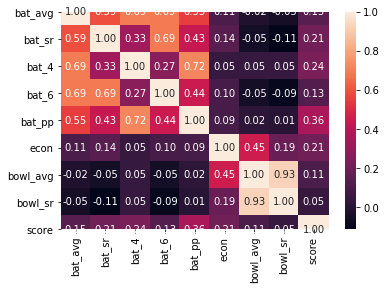

In [356]:
check_corr = check.corr()
print(check_corr.shape)
sns.heatmap(check_corr, annot = True, fmt = ".2f")

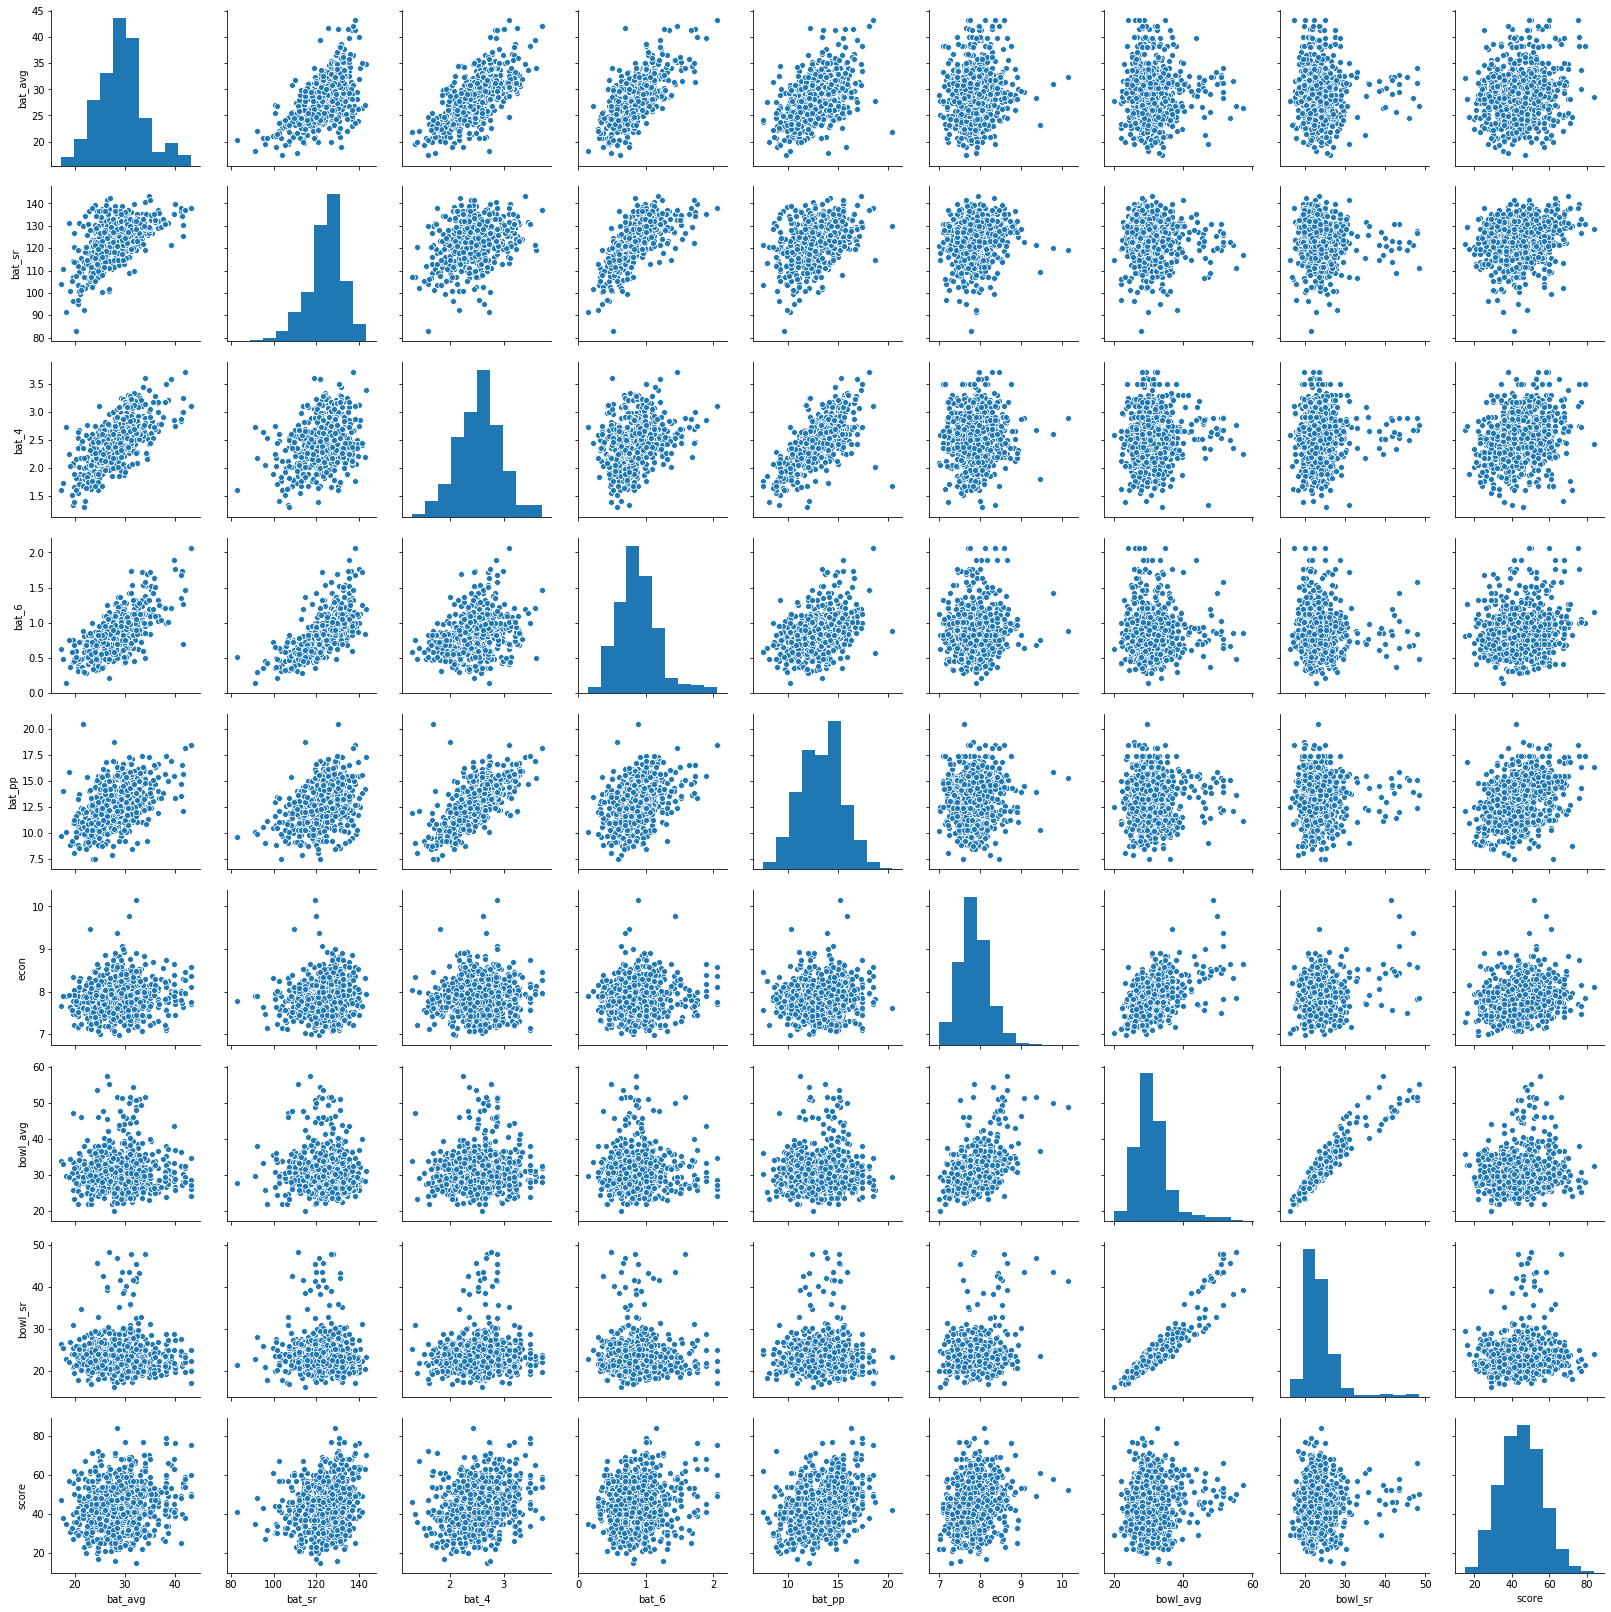

In [335]:
sns.pairplot(check)

In [357]:
X_train, y_train, X_test, y_test = train[:700,:8], train[:700,8], train[700:,:8], train[700:,8]

In [358]:
print(X_train.shape, y_train.shape)

(700, 8) (700,)


In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

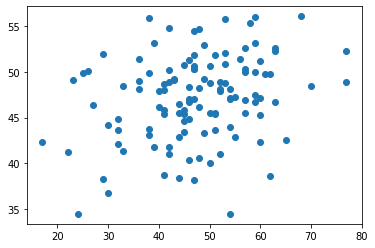

In [360]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test,y_pred)
# set_ylim([10,80])
# ax.set_ylim(0,80)

In [361]:
r2_score(y_test,y_pred)

0.06139495254911076

In [362]:
mean_squared_error(y_test,y_pred)

117.45123340046077

In [363]:
from sklearn.model_selection import cross_val_score

In [367]:
cross_val_score(LinearRegression(), train[:,:8], train[:,8], cv = 5, scoring = 'r2')

array([0.1240256 , 0.19551429, 0.13274849, 0.13849827, 0.04438857])

In [218]:
cross_val_score(LinearRegression(), train[:,:5], train[:,5], cv = 3, scoring = 'r2')

array([0.0743496 , 0.05772531, 0.08556637])

In [216]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [177]:
np.array([i for i in range(19)]).mean()

9.0

In [365]:
sample_input = pd.read_csv('C:\\Users\\varad\\Desktop\\cricket_hackathon\\sampleinput_files\\sampleinput_files\\Apr-23-inn1.csv')

In [366]:
sample_input

,venue,innings,batting_team,bowling_team,batsmen,bowlers
0,MA Chidambaram Stadium,1,Punjab Kings,Mumbai Indians,"Q de Kock,RG Sharma,SA Yadav","TA Boult,J Yadav,JJ Bumrah,KH Pandya"


In [385]:
sample_input.loc[0,'batsmen'].split(',') 
# =
# list(sample_input.loc[0,'batsmen'].split(','))
# print(sample_input.batsmen)

['Q de Kock', 'RG Sharma', 'SA Yadav']

In [397]:
bat_X = []
stats = []
    
avg = np.array([stats_batsman[bat]['avg'] for bat in sample_input.loc[0,'batsmen'].split(',')]).mean().round(2)
sr = np.array([stats_batsman[bat]['sr'] for bat in sample_input.loc[0,'batsmen'].split(',')]).mean().round(2)    
fours = np.array([stats_batsman[bat]['fours'] for bat in sample_input.loc[0,'batsmen'].split(',')]).mean().round(2)    
sixes = np.array([stats_batsman[bat]['sixes'] for bat in sample_input.loc[0,'batsmen'].split(',')]).mean().round(2) 
pp = np.array([stats_batsman[bat]['pp'] for bat in sample_input.loc[0,'batsmen'].split(',')]).mean().round(2)

bat_X = [[avg,sr,fours,sixes,pp]]
# bat_X


bowl_X = []

# stats = []
    
econ = np.array([stats_bowler[bowl]['econ'] for bowl in sample_input.loc[0,'bowlers'].split(',')]).mean().round(2)
av = np.array([stats_bowler[bowl]['avg'] for bowl in sample_input.loc[0,'bowlers'].split(',')]).mean().round(2)
sr = np.array([stats_bowler[bowl]['sr'] for bowl in sample_input.loc[0,'bowlers'].split(',')]).mean().round(2)    

bowl_X = [[econ,av,sr]]
# bowl_X

X = np.c_[bat_X,bowl_X]
# X.shape

model.predict(X)[0]

44.08151080908419

[[7.34, 32.74, 27.58]]

In [391]:
X = np.c_[bat_X,bowl_X]
X.shape

(1, 8)

In [395]:
model.predict(X)[0]

44.08151080908419

In [398]:
import json

In [408]:
batsmen = json.dumps(stats_batsman)

In [402]:
with open('batsman.txt','w')as f:
    f.write(batsmen)

In [411]:
bowler = json.dumps(stats_bowler)

In [412]:
with open('bowler.txt','w')as f:
    f.write(bowler)

In [414]:
model.coef_

array([-0.35390152,  0.15562864,  1.37846595, -0.82649256,  1.90457729,
        5.22565271,  0.26779292, -0.22670713])

In [415]:
model.intercept_

-36.14101929608091

In [427]:
model_params = model.get_params()
model_params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [416]:
import pickle

In [417]:
filename = 'trial_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))

In [418]:
from joblib import dump, load

In [419]:
dump(model, 'trial2.joblib')

['trial2.joblib']

In [426]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
